In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv3D, MaxPooling3D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization,Flatten,\
Add,Input,Dense, Dropout, Activation, InputLayer
from tensorflow.keras.optimizers import Adam


import numpy as np
import pandas as pd


def import_data():


In [ ]:
def model_construction():
    model = models.Sequential(name="test")

    inputs = layers.Input(shape=(10,10,10,10))

    model = MaxPooling3D(pool_size=(2,2,2))(inputs)
    model = Conv3D(32, (2, 2, 2), strides=(1, 1, 1), activation='relu')(model)
    model = MaxPooling3D(pool_size=(2,2,2))(model)
    model = Conv3D(64, (2, 2, 2), strides=(1, 1, 1), activation='relu')(model)
    model = MaxPooling3D(pool_size=(2,2,2))(model)
    model = Conv3D(128, (2, 2, 2), strides=(1, 1, 1), activation='relu')(model)
    
    model = Flatten()(model)
    model = Dense(15,activation='relu')(model)
    output = model
    
    model = Model(inputs=inputs, outputs=output)

    model.add(MaxPooling3D(pool_size=(2,2), strides=2, padding='same'))
    model.add(Conv3D(32, (2,2,2),strides=(1, 1, 1), avtivation='relu'))
    model.add(MaxPooling3D(pool_size=(2,2,2)))
    model.add(Conv3D(64, (2,2,2),strides=(1, 1, 1), avtivation='relu'))
    model.add(MaxPooling3D(pool_size=(2,2,2)))
    model.add(Conv3D(128, (2,2,2),strides=(1, 1, 1), avtivation='relu'))
    model.add(MaxPooling3D(pool_size=(2,2,2)))
    
    model.add

# Peking U example


In [5]:
# Peking U example
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.layers import Conv3D, BatchNormalization,Activation, MaxPool3D, Dropout, Flatten,Dense
from tensorflow.keras import Model

In [31]:
x_train = np.random.rand(100,3,3,3,2)
y_train = np.random.rand(100,1)

x_test = np.random.rand(3,3,3,2)
y_test = np.random.rand(1)

In [32]:
type(y_train)

numpy.ndarray

In [24]:
class Baseline(Model):
    def __init__(self):
        super(Baseline, self).__init__()
        self.c1 = Conv3D(filters=3, kernel_size=2, padding='same')
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')
        self.p1 = MaxPool3D(pool_size=2)
        self.d1 = Dropout(0.2)

        self.flatten = Flatten()
        self.f1 = Dense(128, activation='relu')
        self.d2 = Dropout(0.2)
        self.f2 = Dense(1, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)
        x = self.d1(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d2(x)
        y = self.f2(x)
        return y

In [27]:
model = Baseline()

model.compile(optimizer='adam', loss=tf.keras.losses.MeanAbsoluteError,metrics=['MeanAbsoluteError'])

In [ ]:
model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test), validation_freq=1)

# Tensorflow Official Example
[Link](https://www.tensorflow.org/tutorials/images/cnn)

In [2]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models
# import matplotlib.pyplot as plt

In [4]:
batch_size = 4
depth = 109
height = 104
width = 85
input_channels = 2
frame_count = 10
input_shape =(batch_size, depth,height,width,input_channels)

In [19]:
x_train = np.random.rand(100,depth,height,width,input_channels)
y_train = np.random.rand(100,1)

x_test = np.random.rand(20,depth,height,width,input_channels)
y_test = np.random.rand(20,1)

In [21]:
# Test the Conv3D layer
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv3D(filters=1, kernel_size=3, activation='relu', input_shape=input_shape[1:])(x)
print(y.shape)


(4, 107, 102, 83, 1)


In [23]:
# Test the MaxPooling layer
inputs = tf.keras.Input(shape=input_shape[1:])
layer = tf.keras.layers.MaxPooling3D(pool_size=2)
outputs = layer(inputs)  # Shape: (batch_size, 10, 10, 10, 3)
print(outputs.shape)

(None, 54, 52, 42, 2)


In [5]:
model = models.Sequential()
model.add(layers.Conv3D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape[1:]))
model.add(layers.MaxPooling3D(pool_size=2))
model.add(layers.Conv3D(filters=4, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling3D(pool_size=2))

model.add(layers.Flatten())
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(10))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 107, 102, 83, 64)  3520      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 53, 51, 41, 64)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 51, 49, 39, 4)     6916      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 25, 24, 19, 4)     0         
_________________________________________________________________
flatten (Flatten)            (None, 45600)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 91202     
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Train on 100 samples, validate on 20 samples
Epoch 1/10
100/100 [==============================] - 42s 423ms/sample - loss: 2.2845 - accuracy: 0.0000e+00 - val_loss: 1.0138 - val_accuracy: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 36s 358ms/sample - loss: 0.6580 - accuracy: 0.0000e+00 - val_loss: 0.1018 - val_accuracy: 0.0000e+00
Epoch 3/10
100/100 [==============================] - 30s 297ms/sample - loss: 0.0533 - accuracy: 0.0000e+00 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 4/10
100/100 [==============================] - 29s 292ms/sample - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 4.5245e-05 - val_accuracy: 0.0000e+00
Epoch 5/10
100/100 [==============================] - 29s 287ms/sample - loss: 2.1515e-05 - accuracy: 0.0000e+00 - val_loss: 8.3446e-07 - val_accuracy: 0.0000e+00
Epoch 6/10
100/100 [==============================] - 35s 347ms/sample - loss: 3.9577e-07 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch

## Data Read in

In [2]:
# Rewrite the agrd input into txt format

fin = open("data/2yel/_fld-01_obj-01.agrd.2yel", "rt")
fout = open("out.txt", "wt")


for line in fin:
    fout.write(' '.join(line.split()))
    fout.write("\n")

fin.close()
fout.close()


In [1]:
# Read the txt input and reshape it
import numpy as np
npdata = np.loadtxt('out.txt',delimiter=" ")

# data = npdata.reshape(109,104,85)
Fdata = npdata.reshape((109,104,85),order='F') # Using order F to maintain x-y-z order
# data.shape

In [ ]:
def read_single_frame(path):
    fin = open(path, "rt")
    fout = open("out.txt", "wt")

    for line in fin:
        fout.write(' '.join(line.split()))
        fout.write("\n")

    fin.close()
    fout.close()

    npdata = np.loadtxt('out.txt',delimiter=" ")
    frame_data = npdata.reshape((109,104,85),order='F') # Using order F to maintain x-y-z order
    return frame_data

path = "data/2yel/_fld-01_obj-01.agrd.2yel"
test = read_single_frame(path)
test

In [4]:
test = read_single_frame(path)
fout = open("data/b2yel/_fld-01_obj-02.npy", "wb")

np.save(fout,test)

In [75]:
test = read_single_frame(path)

In [76]:
with open("data/b2yel/_fld-01_obj-01.npy", "rb") as f:
    firstFrame = np.load(f)

# Traverse the directory

In [29]:
import os
path = "data/2yel/"
files =os.listdir(path) 
files.sort()
for file_ in files:    
#    print(path +file_)
    if not os.path.isdir(path +file_): 
        f_name = str(file_)
        print(path + f_name)


data/2yel/_fld-01_obj-01.agrd.2yel
data/2yel/_fld-01_obj-02.agrd.2yel
data/2yel/_fld-01_obj-03.agrd.2yel
data/2yel/_fld-01_obj-04.agrd.2yel
data/2yel/_fld-01_obj-05.agrd.2yel
data/2yel/_fld-01_obj-06.agrd.2yel
data/2yel/_fld-01_obj-07.agrd.2yel
data/2yel/_fld-01_obj-08.agrd.2yel
data/2yel/_fld-01_obj-09.agrd.2yel
data/2yel/_fld-01_obj-10.agrd.2yel


In [ ]:
def traverse_trajactory(path, input_shape):
    frames = []
    files =os.listdir(path) 
    files.sort()
    for file_ in files:     
        # if not os.path.isdir(path +file_): 
        f_name = str(file_)
        frames.append(read_single_frame(path+f_name))
        
    frames = np.stack((frames), axis=3)
    return frames

path = "data/2yel/"
testFrames = traverse_trajactory(path,input_shape)
testFrames.shape

In [83]:
path = "data/2yel/"
bpath = "data/b2yel/"
files =os.listdir(path)
files.sort()
for file_ in files: 
    f_name = str(file_)
    if os.path.exists(bpath+f_name.split(".")[0]+".npy"):
        print(bpath+f_name.split(".")[0]+".npy")
    else:
        print(f_name)

data/b2yel/_fld-01_obj-01.npy
_fld-01_obj-02.agrd.2yel
_fld-01_obj-03.agrd.2yel
_fld-01_obj-04.agrd.2yel
_fld-01_obj-05.agrd.2yel
_fld-01_obj-06.agrd.2yel
_fld-01_obj-07.agrd.2yel
_fld-01_obj-08.agrd.2yel
_fld-01_obj-09.agrd.2yel
_fld-01_obj-10.agrd.2yel


In [68]:
# Basic version of stacking input frames at last axis
def traverse_trajactory(path, bpath):
    frames = []
    files =os.listdir(path) 
    files.sort()
    for file_ in files:     
        # if not os.path.isdir(path +file_): 
        f_name = str(file_)
        frames.append(read_single_frame(path+f_name))
    frames = np.stack((frames), axis=3)
    return frames

path = "data/2yel/"
bpath = "data/b2yel/"
testFrames = traverse_trajactory(path,input_shape)
testFrames.shape

(109, 104, 85, 10)

In [71]:
# Basic version of stacking input frames at first axis
def traverse_trajactory(path, input_shape):
    frames = []
    files =os.listdir(path) 
    files.sort() 
    for file_ in files:     
        # if not os.path.isdir(path +file_):  
        f_name = str(file_)
        frames.append(read_single_frame(path+f_name))
        # if frames.size == 0:
        #     frames = read_single_frame(path+f_name)
        # else:
        #     frames = np.concatenate((frames,read_single_frame(path+f_name)),axis=-1)
    frames = np.stack((frames), axis=0)
    return frames

path = "data/2yel/"
testFrames = traverse_trajactory(path,input_shape)
testFrames.shape

(10, 109, 104, 85)

In [70]:
# Basic version of concatenating input frames at last axis
def traverse_trajactory(path, input_shape):
    frames = []
    files =os.listdir(path) 
    files.sort() 
    for file_ in files:   
        # if not os.path.isdir(path +file_):  
        f_name = str(file_)
        frames.append(read_single_frame(path+f_name))
        # if frames.size == 0:
        #     frames = read_single_frame(path+f_name)
        # else:
        #     frames = np.concatenate((frames,read_single_frame(path+f_name)),axis=-1)
    frames = np.concatenate((frames), axis=-1)
    return frames

path = "data/2yel/"
testFrames = traverse_trajactory(path,input_shape)
testFrames.shape

(109, 104, 850)

## Model test

In [6]:
import tensorflow as tf
import numpy as np
import os

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


batch_size = 4
module_count = 1
frame_count = 10
depth = 109
height = 104
width = 85
input_channels = 2
input_shape =(module_count,depth,height,width,input_channels)

# x_train = np.random.rand(100,depth,height,width,input_channels)
# y_train = np.random.rand(100,1)

x_test = np.random.rand(20,depth,height,width,input_channels)
y_test = np.random.rand(20,1)



In [113]:
def read_single_frame(path,depth, height, width):
    with open(path, "rb") as f:
        npData = np.load(f)
    frameData = npData.reshape((depth,height,width),order='F') # Using order F to maintain x-y-z order
    return frameData

def read_trajactory(path, field):
    frames = []
    files = os.listdir(path)
    files.sort() 
    for file_ in files: 
        f_name = str(file_)
        if field == 1 and 'fld-01' in f_name:
            frames.append(read_single_frame(path+f_name, depth, height, width))
        elif field == 2 and 'fld-02' in f_name:
            frames.append(read_single_frame(path+f_name, depth, height, width))
        # else:
        #     print('Invalid field number')
    frames = np.stack((frames), axis=0)
    return frames

In [116]:
def baseline_model():
    model = models.Sequential()
    model.add(layers.Conv3D(filters=2, kernel_size=3, activation='relu', input_shape=(depth,height,width,input_channels)))
    model.add(layers.MaxPooling3D(pool_size=2))
    model.add(layers.Conv3D(filters=4, kernel_size=2, activation='relu'))
    model.add(layers.MaxPooling3D(pool_size=2))

    model.add(layers.Flatten())
    model.add(layers.Dense(2, activation='relu'))
    model.add(layers.Dense(1))

    return model

def train():
    model = baseline_model()
    model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10, 
                        validation_data=(x_test, y_test))
    return model

In [117]:
path = 'data/b2yel/'
stericMIF = read_trajactory(path, 1)
elecMIF = read_trajactory(path, 2)
x_train = np.stack((stericMIF, elecMIF), axis=4)
y_train = np.ones((10,1))*0.7809668
model = train()
model.save('saved_model/baseline')

Train on 10 samples, validate on 20 samples
Epoch 1/10
10/10 [==============================] - 9s 901ms/sample - loss: 14087241728.0000 - accuracy: 0.0000e+00 - val_loss: 0.3825 - val_accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 6s 551ms/sample - loss: 0.6115 - accuracy: 0.0000e+00 - val_loss: 0.3833 - val_accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 5s 517ms/sample - loss: 0.6125 - accuracy: 0.0000e+00 - val_loss: 0.3839 - val_accuracy: 0.0000e+00
Epoch 4/10
10/10 [==============================] - 6s 571ms/sample - loss: 0.6133 - accuracy: 0.0000e+00 - val_loss: 0.3843 - val_accuracy: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 6s 551ms/sample - loss: 0.6140 - accuracy: 0.0000e+00 - val_loss: 0.3847 - val_accuracy: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 5s 508ms/sample - loss: 0.6146 - accuracy: 0.0000e+00 - val_loss: 0.3851 - val_accuracy: 0.0000e+00
Epoch 7/10
10/10 [================

2022-04-03 16:30:05.334225: W tensorflow/python/util/util.cc:299] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_model/baseline/assets


## Load Y data

In [96]:
import numpy as np
from numpy import genfromtxt

data = genfromtxt("data/WONKA_Equil_MD.csv", delimiter=",")
data[1]

array([nan, nan, nan, nan, nan, nan])

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

data = pd.read_csv("data/bf_w4out4pce.csv", sep=",")
yl =data['pIC50'].values
ll = data['PDB'].values


In [2]:
y_list = (y_list - min(y_list))/(max(y_list)-min(y_list))


NameError: name 'y_list' is not defined

In [3]:
y_list_train = tf.random.shuffle(np.repeat(yl[:40],100),seed=12)
label_list_train=tf.random.shuffle(np.repeat(ll[:40],100),seed=12)

In [9]:
tf.random.set_seed(12)
label_list_shuffled = tf.random.shuffle(ll)
label_list_train = label_list_shuffled[:40]
tf.random.set_seed(12)
label_list_train=tf.random.shuffle(np.repeat(label_list_train,100))

tf.random.set_seed(12)
y_list_shuffled = tf.random.shuffle(yl)
y_list_train = y_list_shuffled[:40]
tf.random.set_seed(12)
y_list_train = tf.random.shuffle(np.repeat(y_list_train,100))


In [10]:
y_list_train

<tf.Tensor: shape=(4000,), dtype=float64, numpy=array([6.19    , 6.886057, 5.39    , ..., 5.58838 , 5.199971, 5.72    ])>

In [6]:
label_list_train

<tf.Tensor: shape=(4000,), dtype=string, numpy=
array([b'3u5l', b'5kj0', b'4nr8', ..., b'5coi', b'4bw2', b'5z90'],
      dtype=object)>

## Quick Test

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa

C:\Users\Delusion\.conda\envs\ckfyp\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.3.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [8]:
model = keras.models.load_model('saved_model/baseline-50',custom_objects = {"Rsquare": tfa.metrics.RSquare()})

In [10]:
depth = 109
height = 104
width = 85
def read_single_frame(path,depth, height, width):
    with open(path, "rb") as f:
        npData = np.load(f)
    frameData = npData.reshape((depth,height,width),order='F') # Using order F to maintain x-y-z order
    return frameData


In [11]:
f1 = read_single_frame('data/b5h21/_fld-01_obj-998.npy',depth, height, width)
f2 = read_single_frame('data/b5h21/_fld-02_obj-998.npy',depth, height, width)
x1_test = np.stack((f1,f2),axis=3)

In [12]:
f1 = read_single_frame('data/b5h21/_fld-01_obj-999.npy',depth, height, width)
f2 = read_single_frame('data/b5h21/_fld-02_obj-999.npy',depth, height, width)
x2_test = np.stack((f1,f2),axis=3)

In [13]:
x_test = np.stack((x1_test,x2_test),axis=0)
x_test.shape

(2, 109, 104, 85, 2)

In [14]:
model.predict(x_test)

array([[6.1166315],
       [6.1166315]], dtype=float32)

In [11]:
import matplotlib as plt

In [12]:
fig, ax = plt.subplots(1,2, figsize=(20,3))
ax = ax.ravel()

for i, metric in enumerate((['acc', 'loss'])):
    ax[i].plot(model.history.history[metric])
    ax[i].plot(model.history.history["val_" + metric])
    ax[i].set_title("Model{}".format(metric))
    ax[i].set_xlabel("epoches")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train","val"])

AttributeError: module 'matplotlib' has no attribute 'subplots'

# Model structure test

In [7]:
def baseline_model():
    model = models.Sequential()
    model.add(layers.Conv3D(filters=2, kernel_size=3, activation='relu', input_shape=(depth,height,width,input_channels)))
    model.add(layers.MaxPooling3D(pool_size=2))
    model.add(layers.Conv3D(filters=4, kernel_size=2, activation='relu'))
    model.add(layers.MaxPooling3D(pool_size=2))

    model.add(layers.Flatten())
    model.add(layers.Dense(2, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='adam',
            loss=tf.keras.losses.MeanSquaredError(),
            metrics=['mse','mae',tfa.metrics.RSquare(dtype=tf.float32, y_shape=(1,))])
    return model

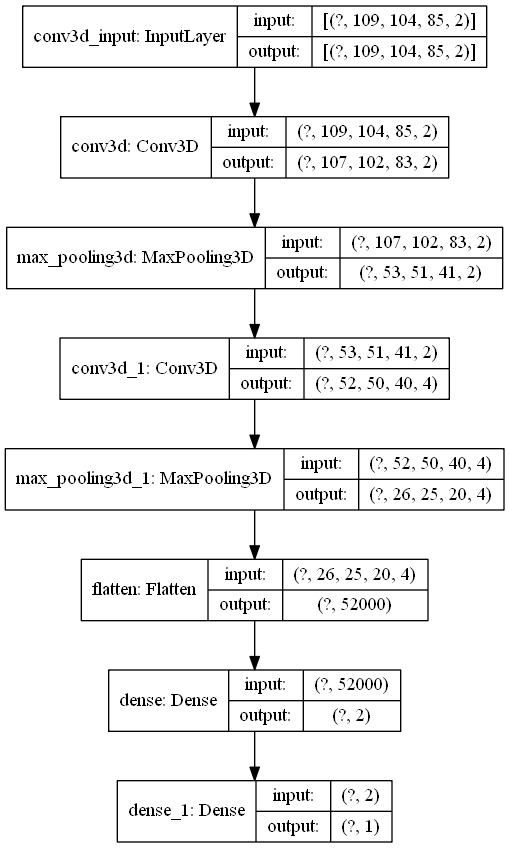

In [8]:
model=baseline_model()
keras.utils.plot_model(model, show_shapes=True,to_file="baseline.png")

In [12]:

def VGG16():
    input = tf.keras.layers.Input((109, 104, 85, 2))

    x = tf.keras.layers.Conv3D(filters=64, kernel_size=3, padding='same', activation="relu")(input)
    x = tf.keras.layers.Conv3D(filters=64, kernel_size=3, padding='same', activation="relu")(x)
    x = tf.keras.layers.MaxPool3D(pool_size=2)(x)
    #x = layers.BatchNormalization()(x)

    x = tf.keras.layers.Conv3D(filters=128, kernel_size=3, padding='same', activation="relu")(x)
    x = tf.keras.layers.Conv3D(filters=128, kernel_size=3, padding='same', activation="relu")(x)
    x = tf.keras.layers.MaxPool3D(pool_size=2)(x)
    #x = layers.BatchNormalization()(x)

    x = tf.keras.layers.Conv3D(filters=256, kernel_size=3, padding='same', activation="relu")(x)
    x = tf.keras.layers.Conv3D(filters=256, kernel_size=3, padding='same', activation="relu")(x)
    x = tf.keras.layers.Conv3D(filters=256, kernel_size=1, padding='same', activation="relu")(x)
    x = tf.keras.layers.MaxPool3D(pool_size=2)(x)
    #x = layers.BatchNormalization()(x)

    x = tf.keras.layers.Conv3D(filters=512, kernel_size=3, padding='same', activation="relu")(x)
    x = tf.keras.layers.Conv3D(filters=512, kernel_size=3, padding='same', activation="relu")(x)
    x = tf.keras.layers.Conv3D(filters=512, kernel_size=1, padding='same', activation="relu")(x)
    x = tf.keras.layers.MaxPool3D(pool_size=2)(x)

    x = tf.keras.layers.Conv3D(filters=512, kernel_size=3, padding='same', activation="relu")(x)
    x = tf.keras.layers.Conv3D(filters=512, kernel_size=3, padding='same', activation="relu")(x)
    x = tf.keras.layers.Conv3D(filters=512, kernel_size=1, padding='same', activation="relu")(x)
    x = tf.keras.layers.MaxPool3D(pool_size=2)(x)

    x = tf.keras.layers.Flatten()(x)

    x = tf.keras.layers.Dense(4096, activation = 'relu')(x)
    x = tf.keras.layers.Dense(4096, activation = 'relu')(x)
    x = tf.keras.layers.Dense(1000, activation = 'sigmoid')(x)

    output = tf.keras.layers.Dense(units=1)(x)

    model = tf.keras.Model(input, output, name="VGG11")

    return model

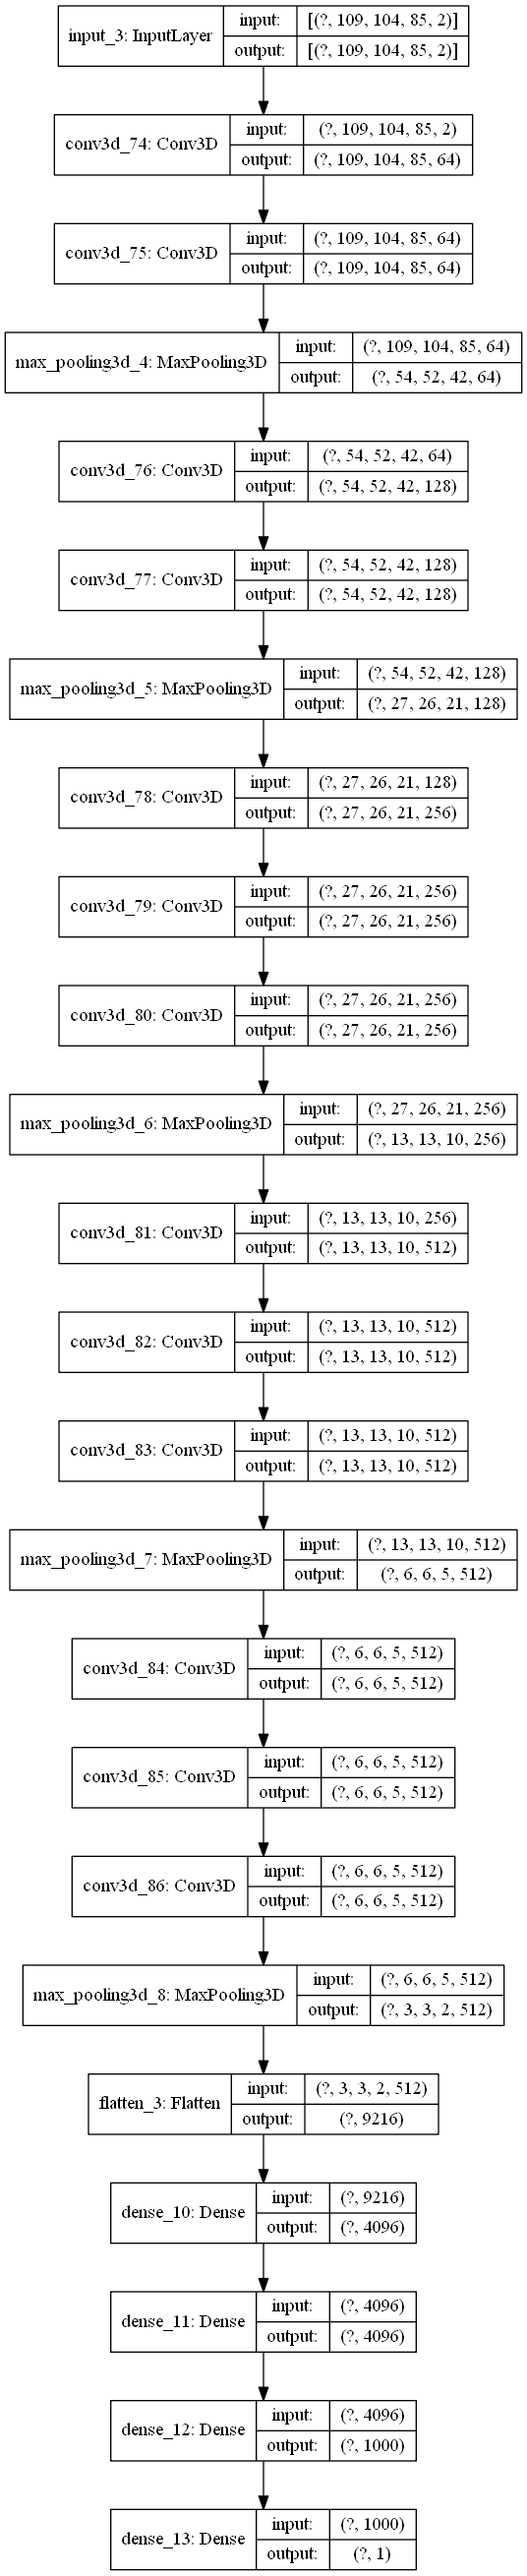

In [14]:
model=VGG16()
keras.utils.plot_model(model, show_shapes=True)